# **1. 데이터 전처리**

In [ ]:
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
df = pd.read_csv("/content/vgames2.csv")
df.head()

Unnamed: 0  ... Other_Sales
0           1  ...           0
1           2  ...        0.01
2           3  ...           0
3           4  ...           0
4           5  ...        0.04

[5 rows x 10 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16598 rows x 9 columns]

In [ ]:
df.shape

(16598, 9)

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# Year 이상치 확인
year = df.Year.unique()
temp = []
for i in year:
  if i <= 1900:
    print(i)
    temp.append(i)

9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


In [ ]:
# Year 통일화
df.loc[(df.Year.values <= 80), 'Year'] += 2000
df.loc[((df.Year.values >=80) & (df.Year.values <= 100)), 'Year'] += 1900

df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# 결측치 제거
df = df.dropna(axis=0)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df.shape

(16241, 9)

In [ ]:
# Sales 이상치 
df.NA_Sales.value_counts()

0       4367
0.02     524
0.03     518
0.01     516
0.04     515
        ... 
1.86       1
6.91       1
3.88       1
4.14       1
4.18       1
Name: NA_Sales, Length: 489, dtype: int64

In [ ]:
# K 포함 데이터 -> 정수
df[df.NA_Sales.str.contains('K')]

Name  ... Other_Sales
10                                        Ford Racing  ...        0.06
45                       Resident Evil: Revelations 2  ...        0.03
145                                TOCA Race Driver 3  ...           0
878    Tears to Tiara Anecdotes: The Secret of Avalon  ...           0
1086                        Pro Evolution Soccer 2014  ...           0
...                                               ...  ...         ...
15647                       Championship Manager 2010  ...           0
16194                            Vin Diesel: Wheelman  ...        0.06
16330                         Midway Arcade Treasures  ...        0.19
16492                                   Mortal Kombat  ...        0.12
16578                            Gex: Enter the Gecko  ...        0.04

[94 rows x 9 columns]

In [ ]:
# M 포함 데이터 -> 실수
df[df.NA_Sales.str.contains('M')]

Name Platform  ...  JP_Sales Other_Sales
447                    Medal of Honor: Warfighter     X360  ...      0.01         0.1
458                                       F1 2010      PS3  ...      0.08        0.27
577                                 Mario Kart 64      N64  ...      2.23        0.15
625                                    The Hobbit      GBA  ...         0           0
672    Star Wars The Clone Wars: Lightsaber Duels      Wii  ...         0        0.14
...                                           ...      ...  ...       ...         ...
15986                 Juiced 2: Hot Import Nights       PC  ...         0           0
16152                       Taiko no Tatsujin Wii      Wii  ...      0.67           0
16169                    Medal of Honor: Airborne     X360  ...      0.01        0.12
16408               NASCAR 06: Total Team Control      PS2  ...         0        0.09
16482            Super Robot Taisen F Kanketsuhen      SAT  ...      0.55           0

[97 rows x 9 columns]

In [ ]:
# Sales 묶어놓기
sales_col = df.columns[5:]
sales_col

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [ ]:
# K 있는 데이터 인덱스로 저쟝
loc_k = df[df.NA_Sales.str.contains('K')].index
loc_k

Int64Index([   10,    45,   145,   878,  1086,  1359,  1456,  1475,  1838,
             1922,  1964,  2673,  2924,  3262,  3328,  3498,  4471,  4978,
             5032,  5284,  5296,  5334,  5768,  6055,  6086,  6115,  6150,
             6153,  6203,  6545,  6595,  6694,  6929,  7023,  7049,  7109,
             7192,  7403,  7435,  7881,  8134,  8189,  8235,  8239,  8579,
             8689,  8842,  8872,  9020,  9257,  9437,  9456,  9566,  9791,
             9829, 10357, 10358, 10544, 10823, 11563, 11992, 11996, 12107,
            12158, 12240, 12332, 12410, 12517, 12745, 12876, 13057, 13341,
            13557, 13798, 13887, 13935, 14180, 14347, 14410, 14446, 14630,
            14757, 15088, 15107, 15111, 15340, 15430, 15597, 15622, 15647,
            16194, 16330, 16492, 16578],
           dtype='int64')

In [ ]:
# Sales에 적용
for col in sales_col:
  na_k = df.loc[df[col].str.contains('K'), col] # 데이터 가져오기
  na_m = df.loc[df[col].str.contains('M'), col]
  na_k = na_k.str.replace('K', '').astype(float) / 1000 # K 빼고, 실수로 바꾸기
  na_m = na_m.str.replace('M', '').astype(float) # M 빼기

  df.loc[df[col].str.contains('K'), col] = na_k.astype(str) 
  df.loc[df[col].str.contains('M'), col] = na_m.astype(str)

df.loc[loc_k]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Name  ... Other_Sales
10                                        Ford Racing  ...        0.06
45                       Resident Evil: Revelations 2  ...        0.03
145                                TOCA Race Driver 3  ...           0
878    Tears to Tiara Anecdotes: The Secret of Avalon  ...           0
1086                        Pro Evolution Soccer 2014  ...           0
...                                               ...  ...         ...
15647                       Championship Manager 2010  ...           0
16194                            Vin Diesel: Wheelman  ...        0.06
16330                         Midway Arcade Treasures  ...        0.19
16492                                   Mortal Kombat  ...        0.12
16578                            Gex: Enter the Gecko  ...        0.04

[94 rows x 9 columns]

In [ ]:
# 숫자형으로 변환
col = df.columns[-4:]
df[col] = df[col].astype(float)
df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# 전세계 출고량 컬럼 추가
global_sales = []
for i in df.index:
  g_sales = df.loc[i, "NA_Sales" : "Other_Sales"].sum()
  global_sales.append(round(g_sales, 2))

df["Global_Sales"] = global_sales
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Name  ... Global_Sales
0                    Candace Kane's Candy Factory  ...         0.04
1                                  The Munchables  ...         0.18
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...         0.02
3                Deal or No Deal: Special Edition  ...         0.04
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...         0.25

[5 rows x 10 columns]

# **2. 시각화**

# **2022년 2분기 게임 설계를 위한 데이터 분석**

* 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답 하셔야 합니다.
* 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야 합니다.
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

* Sprint1: EDA, Refture Engineering, Data Manipulation, Data Visualization
* Sprint2: Hypothesis Test, CI, Bayesian
* Sprint3: DR, PCA, Cluster



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1-1. 지역별 게임 장르 선호도 분석**

In [ ]:
# 지역별 게임 장르 출고량 합계
temp_genre = df[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
temp_genre.columns = ["Genre", "USA Sales", "EU Sales", "JP Sales", "Other Sales"]
temp_grouped = temp_genre.groupby(['Genre']).sum()
temp_table = temp_grouped.reset_index()
temp_table.columns=["Genre", "USA Sales", "EU Sales", "JP Sales", "Other Sales"]
temp_table

Genre  USA Sales  EU Sales  JP Sales  Other Sales
0         Action     858.75    513.64    156.60       183.99
1      Adventure     101.79     63.66     51.87        16.70
2       Fighting     220.35     99.90     87.14        36.15
3           Misc     394.73    208.15    104.18        72.64
4       Platform     445.38    200.63    130.53        51.45
5         Puzzle     121.58     50.47     56.24        12.44
6         Racing     354.70    235.02     56.32        76.51
7   Role-Playing     318.76    183.09    342.93        56.73
8        Shooter     574.48    310.23     38.18       101.86
9     Simulation     181.43    112.99     63.54        31.32
10        Sports     667.26    370.97    134.76       132.35
11      Strategy      67.83     44.82     49.10        11.23

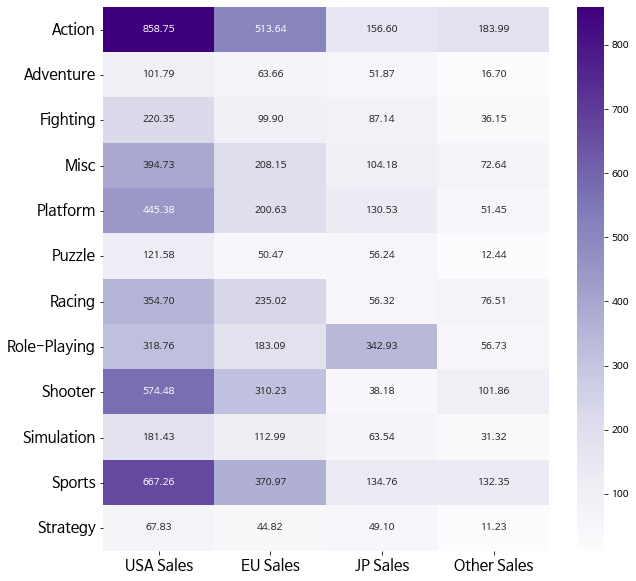

In [ ]:
# 지역별 게임 장르 출고량 히트맵 시각화
plt.figure(figsize=(10, 10))
a = sns.heatmap(temp_grouped, annot=True, fmt=".2f", cmap="Purples")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
a.set_ylabel('', fontsize=15)
plt.show()

# 미국과 유럽은 게임 장르 선호도가 비슷
# 일본의 경우 롤플레잉을 제일 선호

In [ ]:
# 지역별 게임 장르 출고량 TOP 5
def top5_genre(df, sales_col):
  df2 = df.loc[:, ["Genre", sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(5)
  df2.columns = ["Genre", "Sales"]
  return df2

In [ ]:
na_top5 = top5_genre(temp_table, "USA Sales")
eu_top5 = top5_genre(temp_table, "EU Sales")
jp_top5 = top5_genre(temp_table, "JP Sales")
other_top5 = top5_genre(temp_table, "Other Sales")

In [ ]:
data_list = [na_top5, eu_top5, jp_top5, other_top5]
columns_list = temp_table.columns[1:]

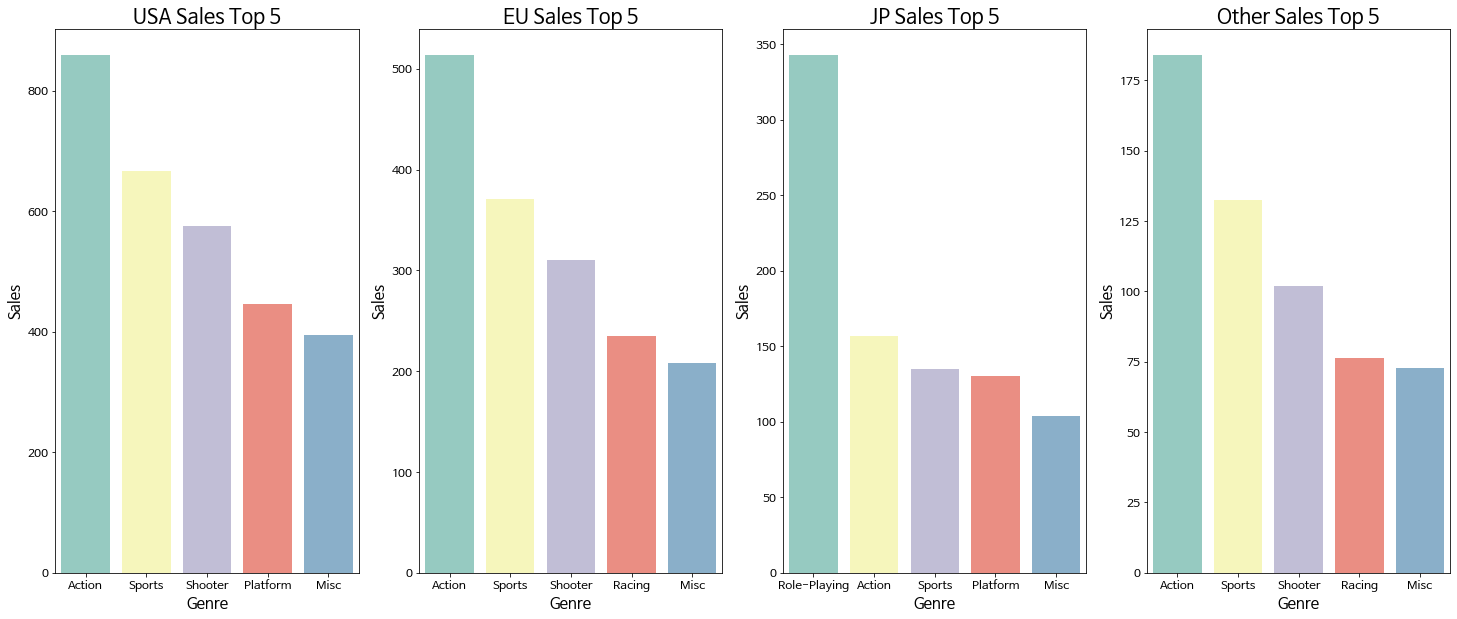

In [ ]:
# 지역별 게임 장르 출고량 TOP 5 막대 그래프 시각화
fig, axs = plt.subplots(figsize=(25, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
  axs[i].set_title(col + " " + "Top 5", fontsize = 20)
  sns.barplot(x="Genre", y="Sales", data=data, ax=axs[i], palette="Set3")
  axs[i].tick_params(axis="both", labelsize=12)
  axs[i].set_xlabel("Genre", fontsize=15)
  axs[i].set_ylabel("Sales", fontsize=15)

plt.show()

# 일본을 제외한 지역은 액션, 스포츠, 슈터 장르 선호
# 일본은 롤플레잉을 가장 선호하지만 액션과 스포츠도 다음으로 선호하는 순서
# 즉, 지역 전체적으로 액션 장르가 가장 인기 있다고 볼 수 있다.

### **1-2. 연도별 게임 장르 선호도**

In [ ]:
# 연도별 최고 출시량 게임 장르
# 연도별 장르 개수
year_genre = df.groupby(["Year", "Genre"]).size().reset_index(name = "count")
year_genre

Year         Genre  count
0    1980.0        Action      1
1    1980.0      Fighting      1
2    1980.0          Misc      4
3    1980.0       Shooter      2
4    1981.0        Action     25
..      ...           ...    ...
383  2016.0        Sports     38
384  2016.0      Strategy     10
385  2017.0        Action      1
386  2017.0  Role-Playing      2
387  2020.0    Simulation      1

[388 rows x 3 columns]

In [ ]:
# 가장 큰 값
year_max = year_genre.groupby(["Year"])["count"].transform(max) == year_genre["count"]
year_max_genre = year_genre[year_max].reset_index(drop=True)
year_max_genre

Year         Genre  count
0   1980.0          Misc      4
1   1981.0        Action     25
2   1982.0        Action     18
3   1983.0        Action      7
4   1984.0        Puzzle      3
5   1984.0        Racing      3
6   1984.0       Shooter      3
7   1985.0      Platform      4
8   1985.0        Puzzle      4
9   1986.0        Action      6
10  1986.0      Platform      6
11  1987.0        Sports      4
12  1988.0      Platform      4
13  1989.0        Puzzle      5
14  1990.0        Action      3
15  1990.0      Platform      3
16  1990.0        Sports      3
17  1991.0        Sports      7
18  1992.0      Fighting      7
19  1993.0      Fighting     11
20  1993.0      Platform     11
21  1994.0      Fighting     22
22  1994.0        Sports     22
23  1995.0      Fighting     29
24  1995.0       Shooter     29
25  1995.0        Sports     29
26  1996.0        Sports     52
27  1997.0        Sports     46
28  1998.0        Sports     70
29  1999.0        Sports     62
30  2000.0        Sports     81
31  2001.0        Sports     96
32  2002.0        Sports    188
33  2003.0        Action    144
34  2004.0        Action    125
35  2005.0        Action    192
36  2006.0        Action    184
37  2007.0        Action    210
38  2008.0        Action    219
39  2009.0        Action    271
40  2010.0        Action    226
41  2011.0        Action    239
42  2012.0        Action    263
43  2013.0        Action    148
44  2014.0        Action    186
45  2015.0        Action    253
46  2016.0        Action    118
47  2017.0  Role-Playing      2
48  2020.0    Simulation      1

In [ ]:
# 중복값 제외
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep= "last").reset_index(drop=True)
year_max_genre.columns=["Year", "Genre", "Count"]
year_max_genre

Year         Genre  Count
0   1980.0          Misc      4
1   1981.0        Action     25
2   1982.0        Action     18
3   1983.0        Action      7
4   1984.0       Shooter      3
5   1985.0        Puzzle      4
6   1986.0      Platform      6
7   1987.0        Sports      4
8   1988.0      Platform      4
9   1989.0        Puzzle      5
10  1990.0        Sports      3
11  1991.0        Sports      7
12  1992.0      Fighting      7
13  1993.0      Platform     11
14  1994.0        Sports     22
15  1995.0        Sports     29
16  1996.0        Sports     52
17  1997.0        Sports     46
18  1998.0        Sports     70
19  1999.0        Sports     62
20  2000.0        Sports     81
21  2001.0        Sports     96
22  2002.0        Sports    188
23  2003.0        Action    144
24  2004.0        Action    125
25  2005.0        Action    192
26  2006.0        Action    184
27  2007.0        Action    210
28  2008.0        Action    219
29  2009.0        Action    271
30  2010.0        Action    226
31  2011.0        Action    239
32  2012.0        Action    263
33  2013.0        Action    148
34  2014.0        Action    186
35  2015.0        Action    253
36  2016.0        Action    118
37  2017.0  Role-Playing      2
38  2020.0    Simulation      1

In [ ]:
genre = year_max_genre["Genre"].values

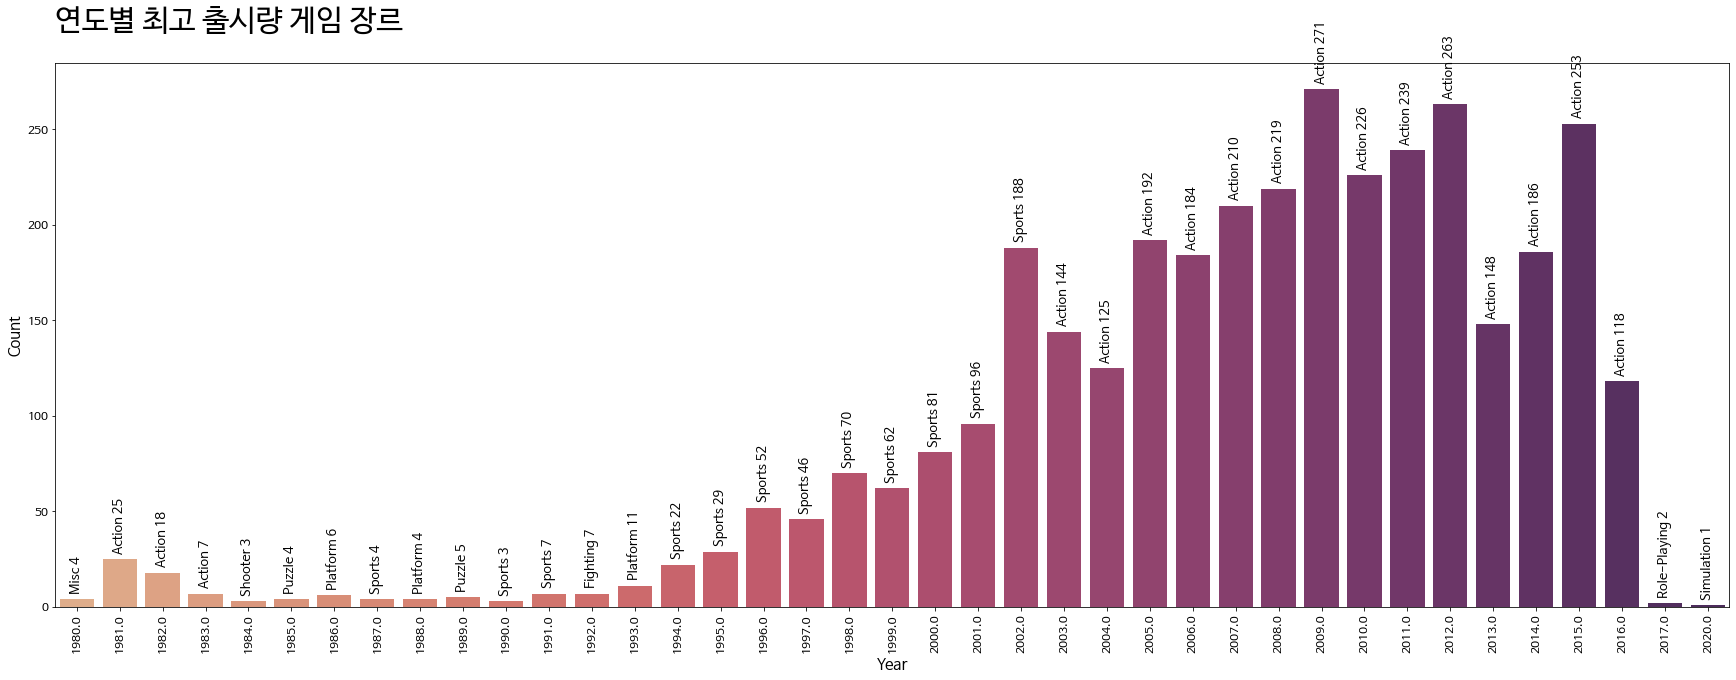

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(x="Year", y="Count", data=year_max_genre, palette = "flare")
idx = 0
for value in year_max_genre["Count"]:
  ax.text(x=idx, y=value + 5, s=str(genre[idx] + ' ' + str(value)),
          color = "black", size = 13, rotation = 90, ha = "center")
  idx += 1
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Count", fontsize=15)
ax.set_title("연도별 최고 출시량 게임 장르", y = 1.05, fontsize=30, loc="left")
plt.show()

# 최근 10년동안 액션 장르 게임이 많이 출시되었다. 

In [ ]:
# 연도별 전세계 최고 출고량 게임 장르
year_max_sales = df.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()
condition = year_max_sales["Global_Sales"] == year_max_sales.groupby(["Year"])["Global_Sales"].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ["Year", "Genre", "Global Sales"]
year_max_sales

Year         Genre  Global Sales
3    1980.0       Shooter          7.07
4    1981.0        Action         14.79
14   1982.0        Puzzle         10.04
21   1983.0      Platform          6.93
30   1984.0       Shooter         31.10
34   1985.0      Platform         43.17
39   1986.0        Action         13.74
47   1987.0      Fighting          5.42
53   1988.0      Platform         27.73
63   1989.0        Puzzle         37.75
68   1990.0      Platform         22.98
78   1991.0      Platform          7.63
88   1992.0      Fighting         15.23
102  1993.0      Platform         18.68
114  1994.0      Platform         28.76
126  1995.0      Platform         16.69
141  1996.0  Role-Playing         43.99
152  1997.0        Racing         31.92
168  1998.0        Sports         41.75
177  1999.0  Role-Playing         47.24
192  2000.0        Sports         41.24
194  2001.0        Action         56.68
206  2002.0        Action         86.65
218  2003.0        Action         67.98
230  2004.0        Action         76.15
242  2005.0        Action         85.52
264  2006.0        Sports        136.12
266  2007.0        Action        105.99
278  2008.0        Action        135.46
300  2009.0        Sports        138.59
302  2010.0        Action        117.50
314  2011.0        Action        119.00
326  2012.0        Action        120.78
338  2013.0        Action        125.21
350  2014.0        Action         99.01
362  2015.0        Action         68.25
374  2016.0        Action         19.84
386  2017.0  Role-Playing          0.04
387  2020.0    Simulation          0.29

In [ ]:
genre = year_max_sales["Genre"].values

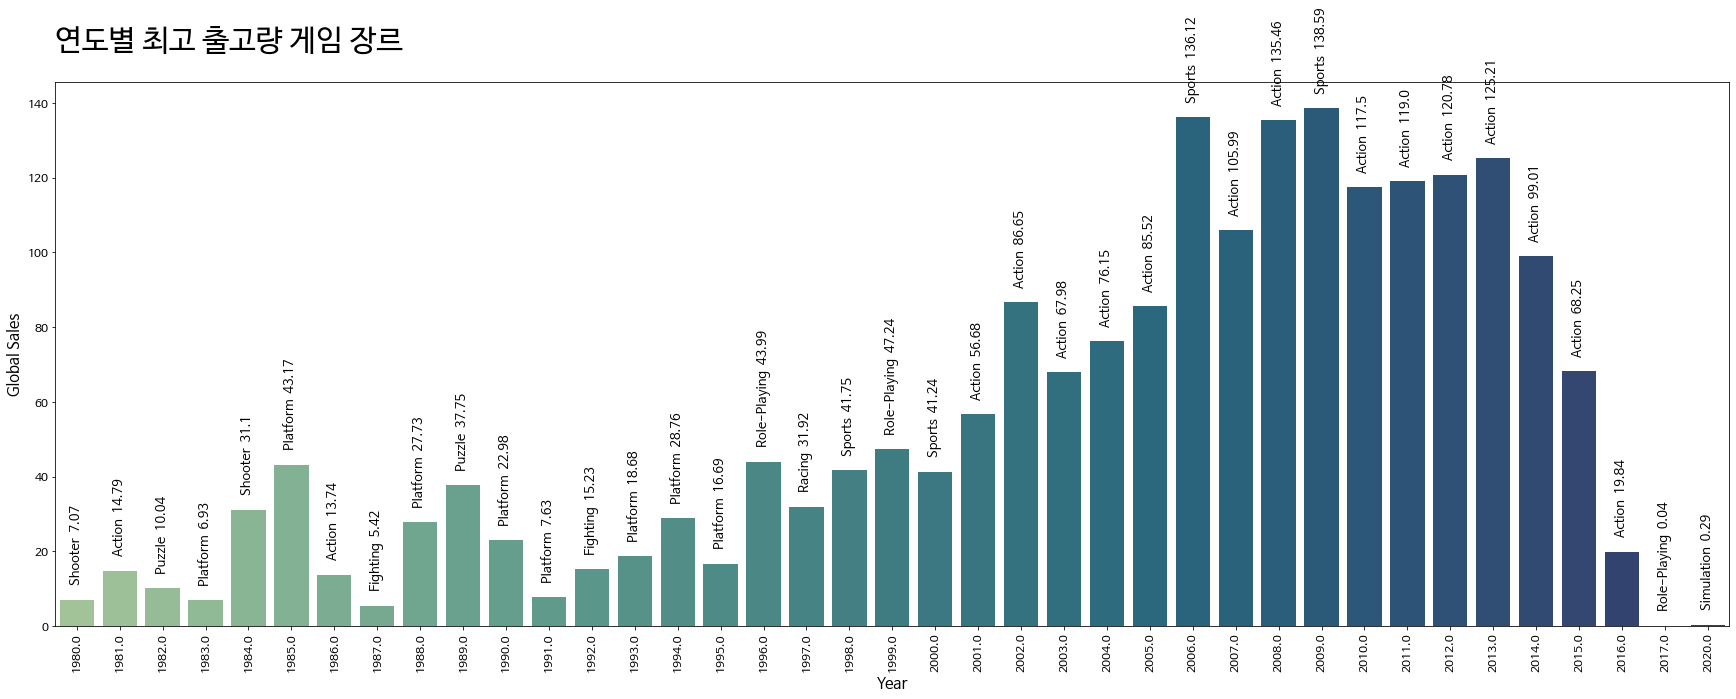

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(x = "Year", y = "Global Sales", data = year_max_sales, palette="crest")
idx = 0
for value in year_max_sales["Global Sales"]:
  ax.text(x=idx, y=value + 5, s=str(genre[idx] + " " + " " + str(round(value, 2))), 
          color = "black", size = 13, rotation = 90, ha = "center")
  idx += 1
ax.set_title("연도별 최고 출고량 게임 장르", y=1.05, fontsize=30, loc="left")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Global Sales", fontsize=15)
plt.show()

# 최근 10년간 액션 장르의 출고량이 높았다. 
# 즉, 최근 10년 동안 액션 장르 게임의 선호도가 높다는 것을 알 수 있다.

# **2. 플랫폼 분석**
### **2-1. 지역별 플랫폼 선호도**

In [ ]:
# 지역별 플랫폼 선호도 분석
temp_platform = df[["Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
temp_platform.columns = ["Platform", "USA Sales", "EU Sales", "JP Sales", "Other Sales"]
temp_grouped_2 = temp_platform.groupby(['Platform']).sum()
temp_table_2 = temp_grouped_2.reset_index()
temp_table_2.columns=["Platform", "USA Sales", "EU Sales", "JP Sales", "Other Sales"]
temp_table_2

Platform  USA Sales  EU Sales  JP Sales  Other Sales
0      2600      80.32      4.83      0.00         0.83
1       3DO       0.00      0.00      0.10         0.00
2       3DS      72.86     54.24     92.96        11.76
3        DC       5.43      1.69      8.56         0.27
4        DS     387.93    194.05    174.97        60.24
5        GB     113.64     47.51     85.12         8.16
6       GBA     178.26     72.43     46.56         7.51
7        GC     131.74     38.27     20.90         5.11
8       GEN      19.27      5.52      2.67         0.89
9        GG       0.00      0.00      0.04         0.00
10      N64     138.34     40.67     33.47         4.28
11      NES     125.94     21.15     98.65         5.31
12       NG       0.00      0.00      1.44         0.00
13       PC      92.03    136.51      0.17        24.24
14     PCFX       0.00      0.00      0.03         0.00
15       PS     333.79    211.75    139.09        40.53
16      PS2     568.54    332.03    134.10       187.77
17      PS3     388.00    339.71     78.56       140.47
18      PS4      95.80    122.94     14.04        43.00
19      PSP     106.50     67.15     75.72        41.47
20      PSV      16.07     16.27     20.81         8.41
21      SAT       0.72      0.54     32.26         0.07
22      SCD       1.00      0.36      0.45         0.05
23     SNES      61.23     19.04    116.55         3.22
24     TG16       0.00      0.00      0.16         0.00
25       WS       0.00      0.00      1.42         0.00
26      Wii     495.10    260.78     65.79        78.48
27     WiiU      38.32     24.23     12.79         6.45
28     X360     593.78    277.90     12.29        84.62
29       XB     179.24     58.37      1.38         8.31
30     XOne      83.19     45.63      0.34        11.92

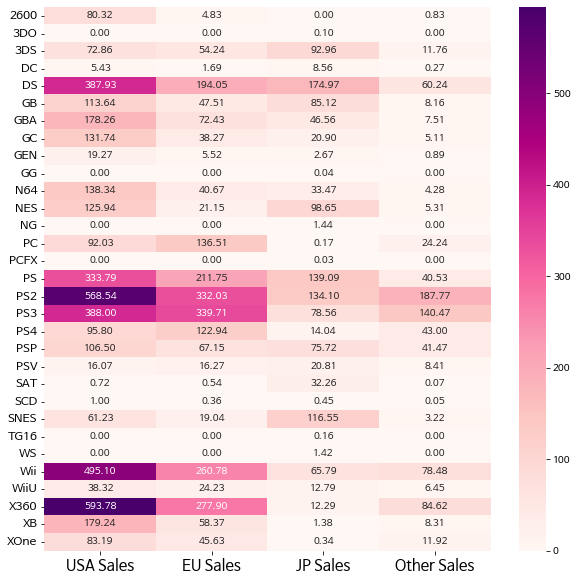

In [ ]:
# 지역별 플랫폼 선호도 히트맵 시각화
plt.figure(figsize=(10, 10))
a = sns.heatmap(temp_grouped_2, annot=True, fmt=".2f", cmap="RdPu")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
a.set_ylabel('', fontsize=14)
plt.show()

# 플레이스테이션이 전체적으로 선호도가 높은 편
# 닌텐도는 wii, Ds가 선호도가 높고, XBox는 x360모델이 가장 인기

In [ ]:
# 지역별 플랫폼 TOP 5
def top5_pf(df, sales_col):
  df3 = df.loc[:, ["Platform", sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(5)
  df3.columns = ["Platform", "Sales"]
  return df3

In [ ]:
na_top5_pf = top5_pf(temp_table_2, "USA Sales")
eu_top5_pf= top5_pf(temp_table_2, "EU Sales")
jp_top5_pf = top5_pf(temp_table_2, "JP Sales")
other_top5_pf = top5_pf(temp_table_2, "Other Sales")

In [ ]:
data_list_2 = [na_top5_pf, eu_top5_pf, jp_top5_pf, other_top5_pf]
columns_list_2 = temp_table_2.columns[1:]

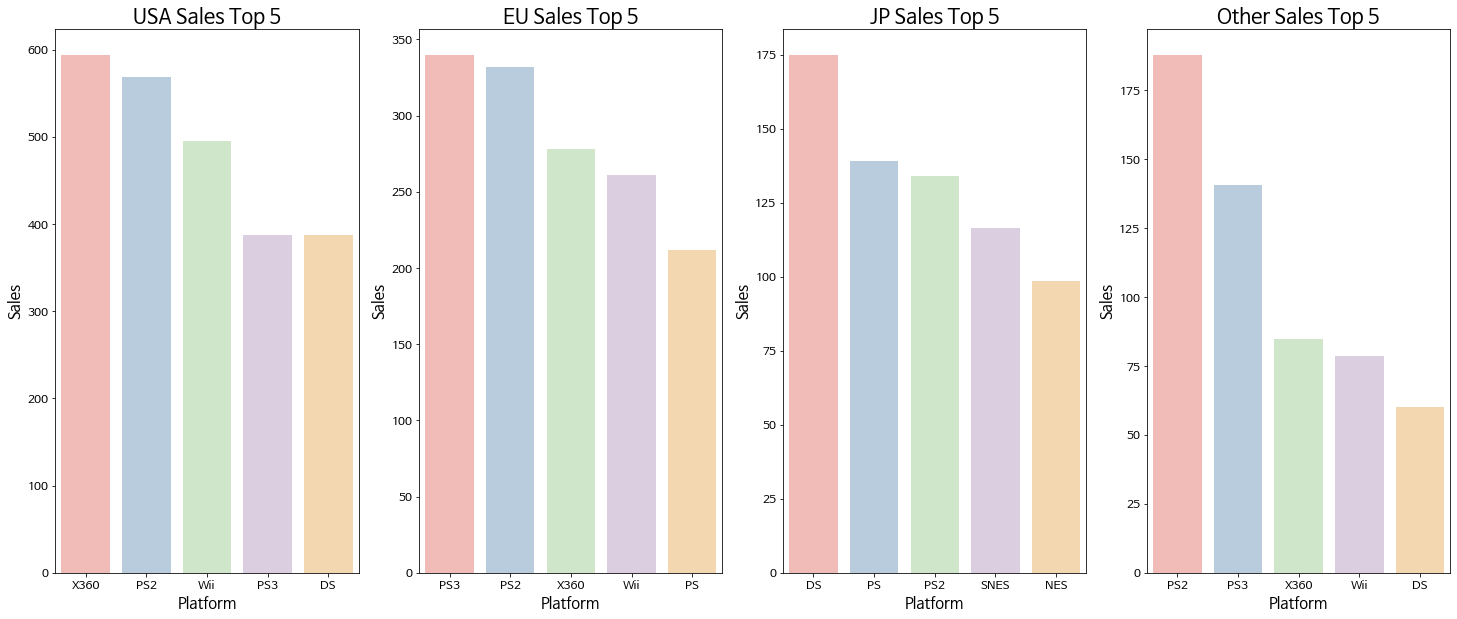

In [ ]:
# 지역별 플랫폼 TOP 5 막대 그래프 시각화
fig, axs = plt.subplots(figsize=(25, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list_2, range(len(columns_list_2)), data_list_2):
  axs[i].set_title(col + " " + "Top 5", fontsize = 20)
  sns.barplot(x="Platform", y="Sales", data=data, ax=axs[i], palette="Pastel1")
  axs[i].tick_params(axis="both", labelsize=12)
  axs[i].set_xlabel("Platform", fontsize=15)
  axs[i].set_ylabel("Sales", fontsize=15)

plt.show()

# 전체적으로 플레이스테이션의 선호도가 높은 편이다.

### **2-2. 연도별 플랫폼 선호도**

In [ ]:
# 연도별 최고 출시량 플랫폼
# 연도별 플랫폼 개수
year_pf = df.groupby(["Year", "Platform"]).size().reset_index(name = "count")
year_pf

Year Platform  count
0    1980.0     2600      8
1    1981.0     2600     46
2    1982.0     2600     36
3    1983.0     2600     11
4    1983.0      NES      6
..      ...      ...    ...
236  2016.0     X360      8
237  2016.0     XOne     54
238  2017.0      PS4      1
239  2017.0      PSV      2
240  2020.0       DS      1

[241 rows x 3 columns]

In [ ]:
# 가장 큰 값
condition = year_pf.groupby(["Year"])["count"].transform(max) == year_pf["count"]
year_max_pf = year_pf[condition].reset_index(drop=True)
year_max_pf

Year Platform  count
0   1980.0     2600      8
1   1981.0     2600     46
2   1982.0     2600     36
3   1983.0     2600     11
4   1984.0      NES     13
5   1985.0      NES     11
6   1986.0      NES     19
7   1987.0      NES     10
8   1988.0      NES     11
9   1989.0       GB     10
10  1990.0      NES      8
11  1991.0     SNES     24
12  1992.0     SNES     21
13  1993.0     SNES     46
14  1994.0     SNES     53
15  1995.0       PS     99
16  1996.0       PS    163
17  1997.0       PS    188
18  1998.0       PS    248
19  1999.0       PS    198
20  2000.0       PS    159
21  2001.0      PS2    184
22  2002.0      PS2    280
23  2003.0      PS2    256
24  2004.0      PS2    258
25  2005.0      PS2    260
26  2006.0      PS2    258
27  2007.0       DS    377
28  2008.0       DS    490
29  2009.0       DS    405
30  2010.0       DS    326
31  2011.0      PS3    216
32  2012.0      PS3    147
33  2013.0      PS3    127
34  2014.0      PS3    108
35  2015.0      PS4    136
36  2016.0      PS4    107
37  2017.0      PSV      2
38  2020.0       DS      1

In [ ]:
# 중복값 제외
year_max_pf = year_max_pf.drop_duplicates(subset=["Year", "count"], keep= "last").reset_index(drop=True)
year_max_pf.columns=["Year", "Platform", "Count"]
year_max_pf

Year Platform  Count
0   1980.0     2600      8
1   1981.0     2600     46
2   1982.0     2600     36
3   1983.0     2600     11
4   1984.0      NES     13
5   1985.0      NES     11
6   1986.0      NES     19
7   1987.0      NES     10
8   1988.0      NES     11
9   1989.0       GB     10
10  1990.0      NES      8
11  1991.0     SNES     24
12  1992.0     SNES     21
13  1993.0     SNES     46
14  1994.0     SNES     53
15  1995.0       PS     99
16  1996.0       PS    163
17  1997.0       PS    188
18  1998.0       PS    248
19  1999.0       PS    198
20  2000.0       PS    159
21  2001.0      PS2    184
22  2002.0      PS2    280
23  2003.0      PS2    256
24  2004.0      PS2    258
25  2005.0      PS2    260
26  2006.0      PS2    258
27  2007.0       DS    377
28  2008.0       DS    490
29  2009.0       DS    405
30  2010.0       DS    326
31  2011.0      PS3    216
32  2012.0      PS3    147
33  2013.0      PS3    127
34  2014.0      PS3    108
35  2015.0      PS4    136
36  2016.0      PS4    107
37  2017.0      PSV      2
38  2020.0       DS      1

In [ ]:
platform = year_max_pf["Platform"].values

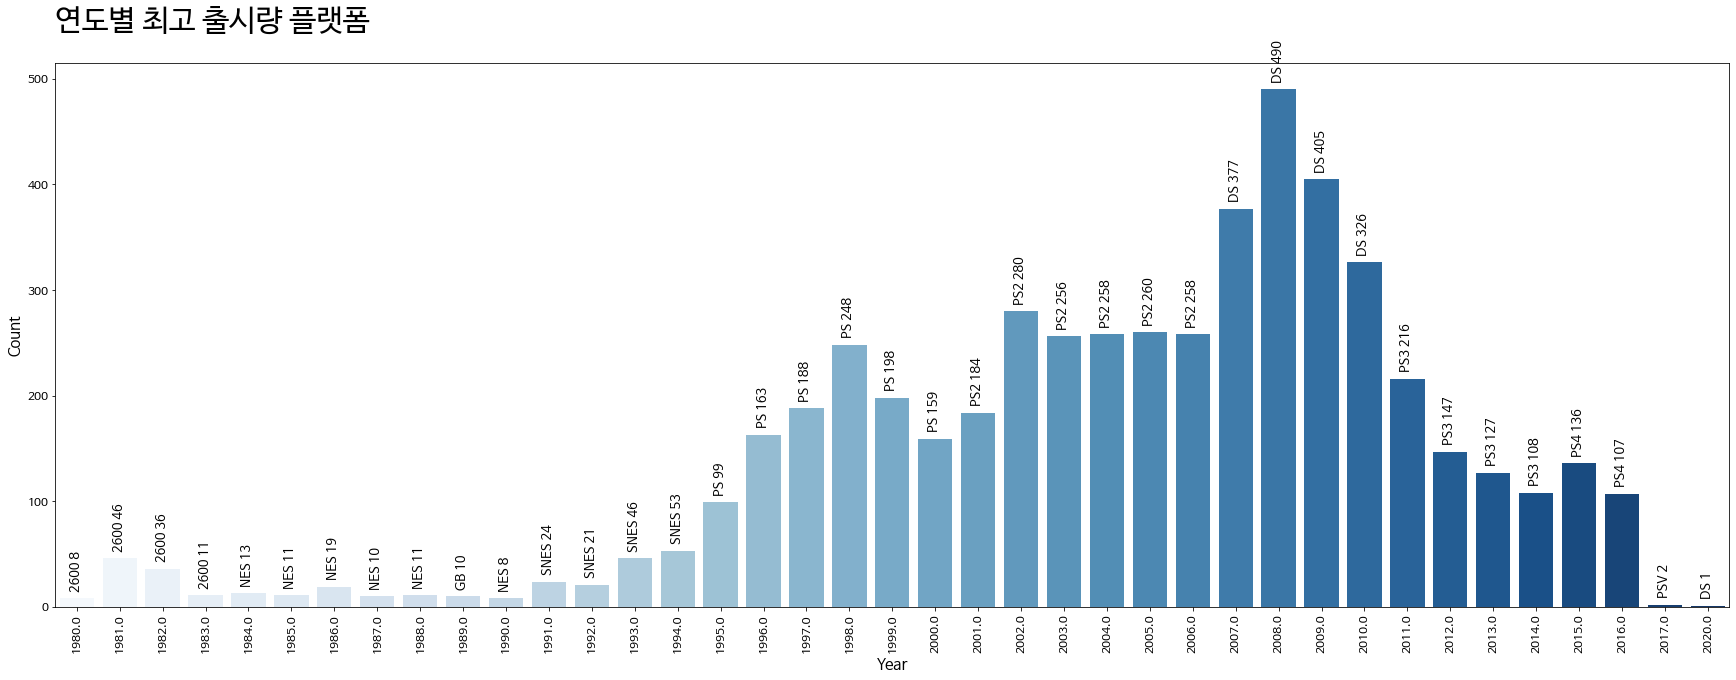

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(x="Year", y="Count", data=year_max_pf, palette = "Blues")
idx = 0
for value in year_max_pf["Count"]:
  ax.text(x=idx, y=value + 10, s=str(platform[idx] + ' ' + str(value)),
          color = "black", size = 13, rotation = 90, ha = "center")
  idx += 1
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Count", fontsize=15)
ax.set_title("연도별 최고 출시량 플랫폼", y = 1.05, fontsize=30, loc="left")
plt.show()

# 최근 10년동안 플레이스테이션이 시장을 점유하고 있다.

In [ ]:
# 연도별 전세계 최고 출고량 플랫폼
year_max_pf = df.groupby(["Year", "Platform"])["Global_Sales"].sum().reset_index()
condition = year_max_pf["Global_Sales"] == year_max_pf.groupby(["Year"])["Global_Sales"].transform(max)
year_max_pf = year_max_pf[condition]
year_max_pf.columns = ["Year", "Platform", "Global Sales"]
year_max_pf

Year Platform  Global Sales
0    1980.0     2600         10.88
1    1981.0     2600         35.68
2    1982.0     2600         28.88
4    1983.0      NES         10.96
6    1984.0      NES         50.08
9    1985.0      NES         53.44
12   1986.0      NES         36.41
14   1987.0      NES         19.76
17   1988.0      NES         45.01
20   1989.0       GB         64.97
25   1990.0     SNES         26.15
29   1991.0     SNES         16.22
35   1992.0     SNES         32.98
40   1993.0     SNES         40.02
50   1994.0     SNES         35.08
55   1995.0       PS         35.96
64   1996.0       PS         94.28
70   1997.0       PS        136.17
77   1998.0       PS        169.49
84   1999.0       PS        142.57
93   2000.0       PS         96.35
104  2001.0      PS2        163.73
113  2002.0      PS2        205.38
119  2003.0      PS2        184.31
125  2004.0      PS2        210.47
132  2005.0      PS2        160.66
143  2006.0      Wii        137.85
154  2007.0      Wii        154.60
163  2008.0      Wii        173.98
171  2009.0      Wii        210.26
179  2010.0     X360        170.95
184  2011.0      PS3        159.37
192  2012.0      PS3        108.32
201  2013.0      PS3        117.42
213  2014.0      PS4         98.83
223  2015.0      PS4        112.86
233  2016.0      PS4         39.30
238  2017.0      PS4          0.03
240  2020.0       DS          0.29

In [ ]:
platform = year_max_pf["Platform"].values

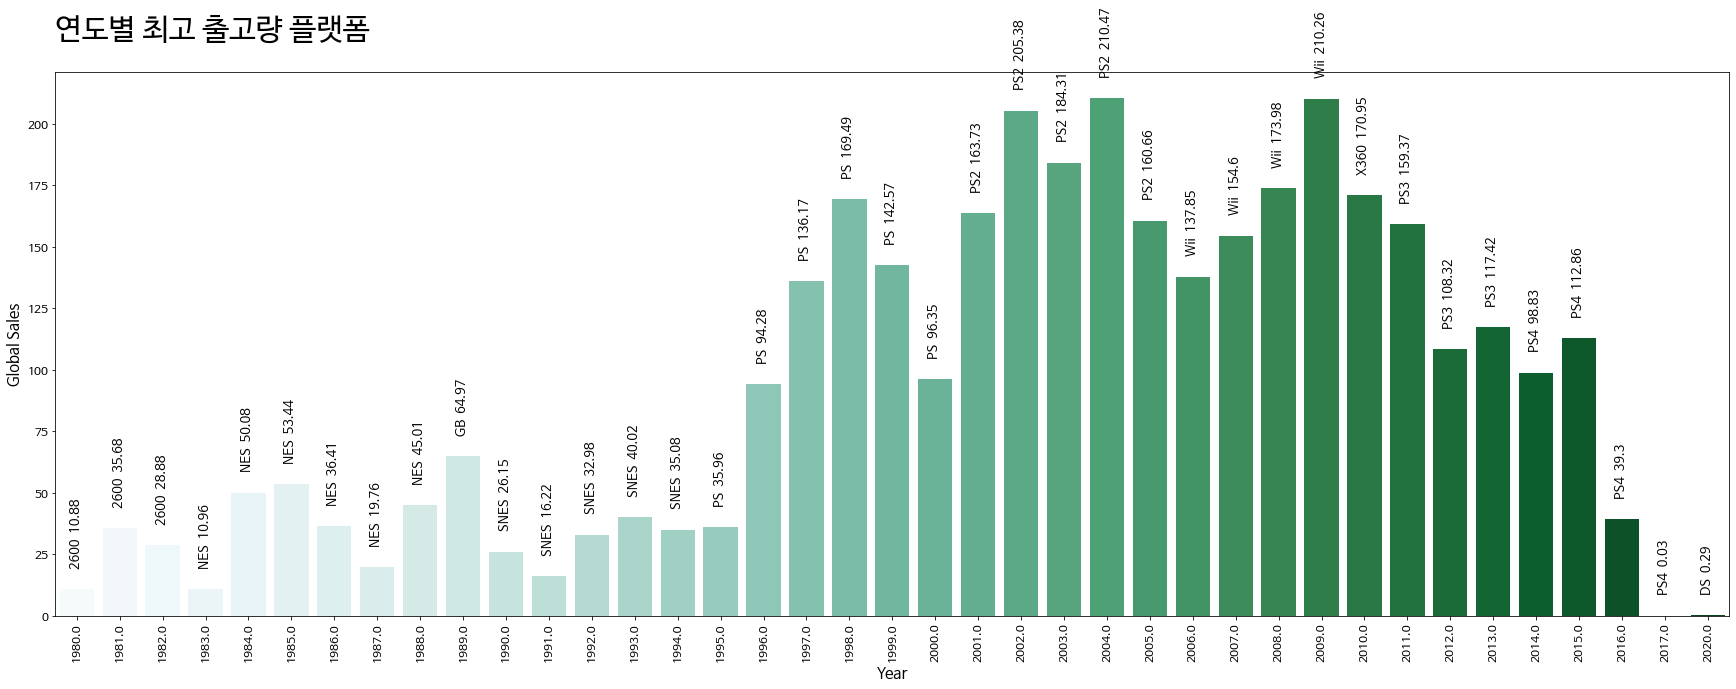

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(x = "Year", y = "Global Sales", data = year_max_pf, palette = "BuGn")
idx = 0
for value in year_max_pf["Global Sales"]:
  ax.text(x=idx, y=value + 10, s=str(platform[idx] + " " + " " + str(round(value, 2))), 
          color = "black", size = 13, rotation = 90, ha = "center")
  idx += 1
ax.set_title("연도별 최고 출고량 플랫폼", y=1.05, fontsize=30, loc="left")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Global Sales", fontsize=15)
plt.show()

# 플레이스테이션이 높은 출고량을 기록하고 있다.
# wii는 2006~2009년까지는 인기를 끌었지만 
# 그 이후 최근까지 플레이스테이션이 가장 선호도가 높은 플랫폼이라고 볼 수 있다.

# **3. 제작회사 분석**
### **3-1. 제작회사별 출고량**


In [ ]:
# 제작회사별 출고량
temp_pb = df[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
temp_pb.columns = ["Publisher", "USA Sales", "EU Sales", "JP Sales", "Other Sales", "Global Sales"]
temp_grouped_3 = temp_pb.groupby(by = ['Publisher']).sum()

In [ ]:
publisher_df = temp_grouped_3.reset_index().sort_values(by=["Global Sales"], ascending = False).head(10)
publisher_mt = pd.melt(publisher_df, id_vars=["Publisher"], value_vars = temp_pb.columns[1:-1],
                       var_name = "Sales Area", value_name = "Sales")
publisher_mt.head()

Publisher Sales Area   Sales
0                     Nintendo  USA Sales  808.14
1              Electronic Arts  USA Sales  579.90
2                   Activision  USA Sales  425.10
3  Sony Computer Entertainment  USA Sales  263.70
4                      Ubisoft  USA Sales  252.26

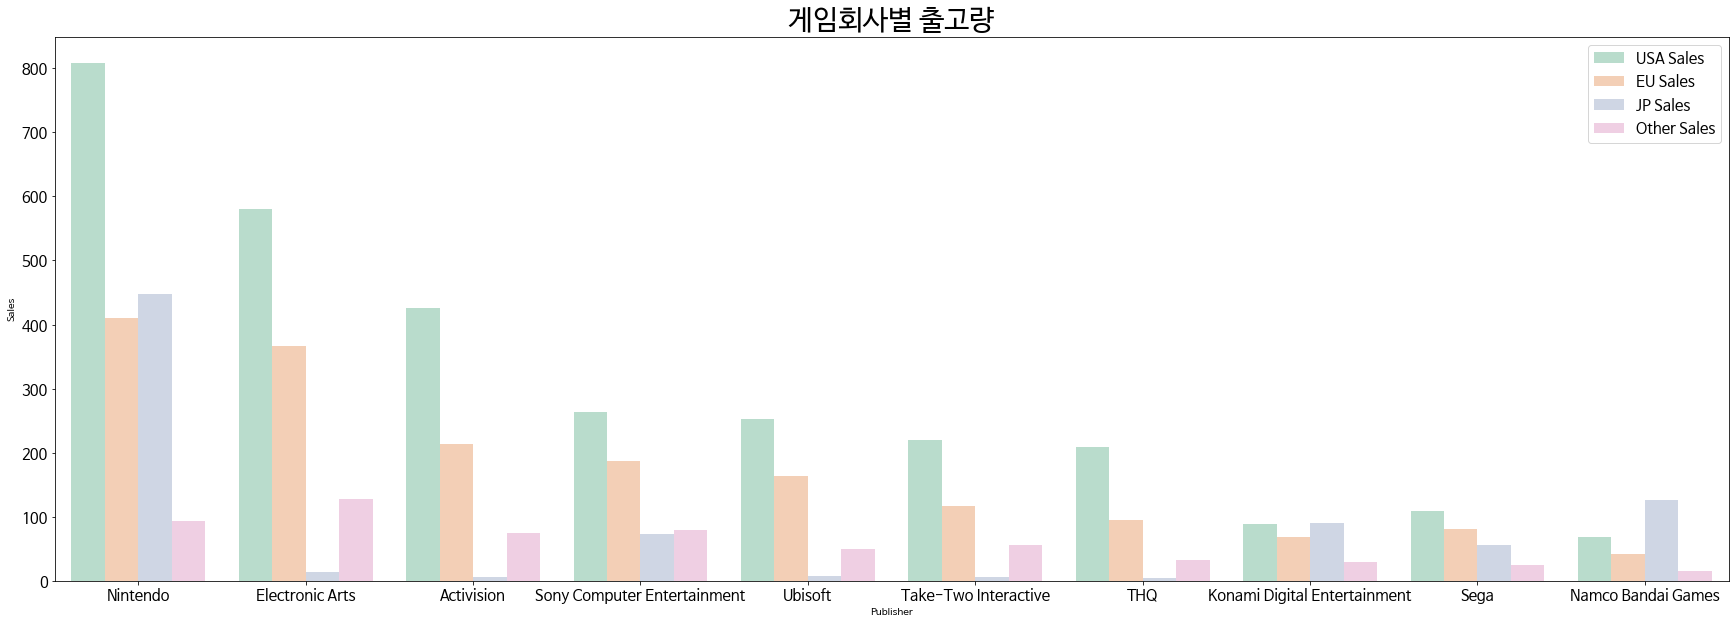

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(x="Publisher", y="Sales", hue='Sales Area', data = publisher_mt, palette = "Pastel2")
ax.set_title("게임회사별 출고량", fontsize=28)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)
plt.show()

# 회사별 출고량 데이터를 보면 일본을 제외한 국가는 회사 국적 영향없이 선호도 좋음
# 일본은 자국 회사에 높은 선호도 보임

### **3-2. 연도별 최고 출시량 회사**

In [ ]:
# 데이터셋 생성
year_com = df.groupby(["Year", "Publisher"]).size().reset_index(name = "count")
condition = year_com["count"] == year_com.groupby(["Year"])["count"].transform(max)
year_max_com = year_com[condition]
year_max_com[:5]

Year   Publisher  count
0   1980.0  Activision      4
1   1980.0       Atari      4
4   1981.0       Atari     11
19  1982.0       Atari     14
35  1983.0       Atari      6

In [ ]:
# 중복값 제외
year_max_com = year_max_com.drop_duplicates(subset=["Year", "count"], keep = "last").reset_index(drop=True)
year_max_com.columns = ["Year", "Publisher", "Count"]

In [ ]:
publisher = year_max_com.Publisher

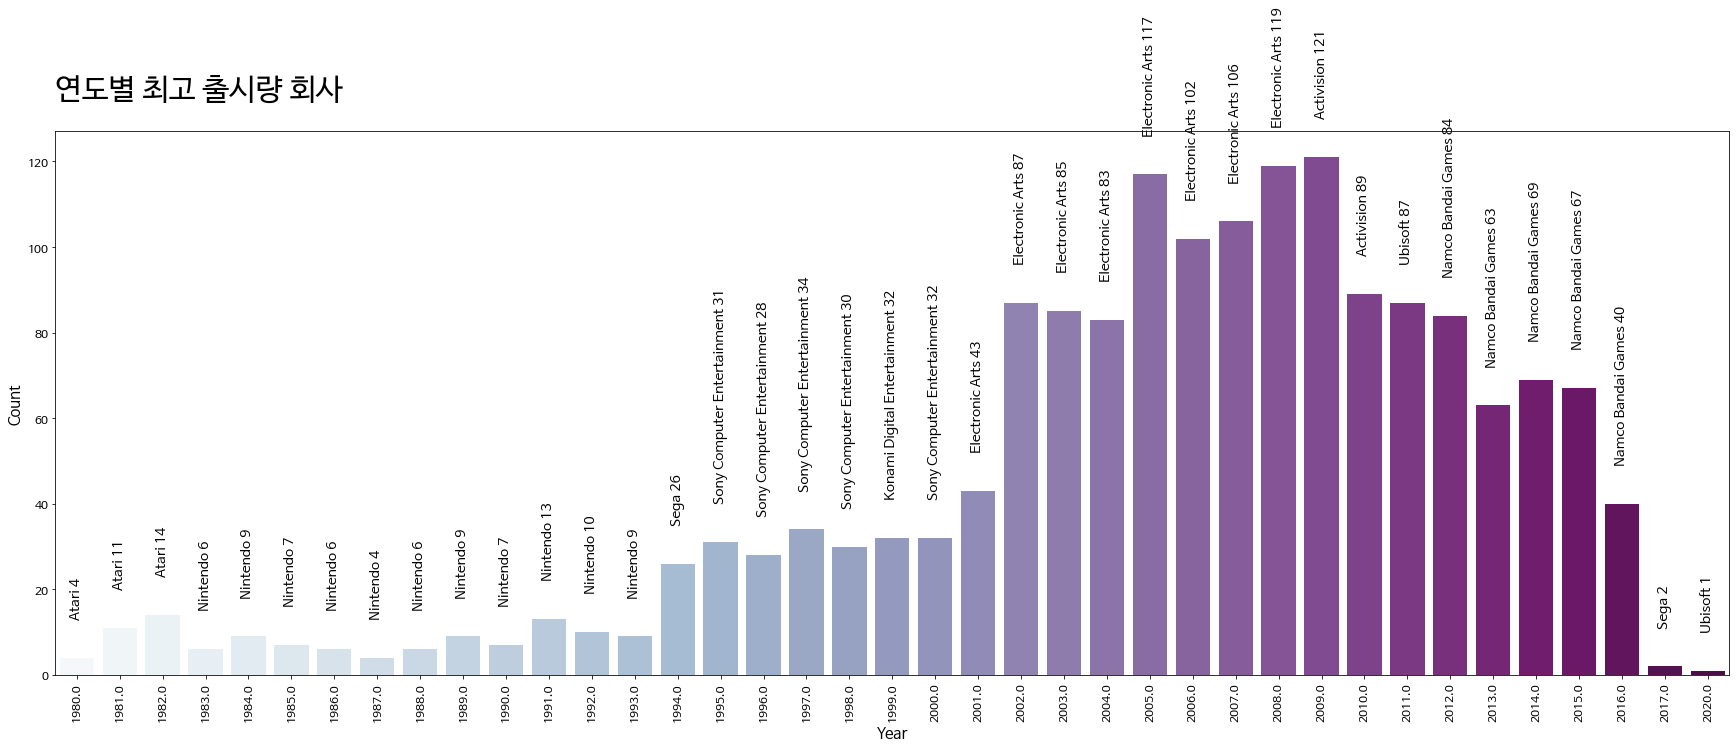

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(x="Year", y='Count', data = year_max_com, palette = "BuPu")
idx = 0
for value in year_max_com["Count"]:
  ax.text(x=idx, y=value + 10, s= str(publisher[idx] + ' ' + str(value)),
          color = "black", size = 14, rotation = 90, ha="center")
  idx += 1
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
ax.set_title("연도별 최고 출시량 회사", fontsize = 30, y = 1.05, loc="left")
plt.show()

# 2000년 초반에는 일렉트로닉 아츠가 시장을 점유해왔고
# 2012년 부터 반다이 남코 엔터테인먼트의 게임이 가장 높은 출시량을 기록했다.

### **3-3. 연도별 최고 출고량 회사**

In [ ]:
year_com = df.groupby(["Year", "Publisher"])["Global_Sales"].sum().reset_index(name="Sales")
condition = year_com["Sales"] == year_com.groupby(["Year"])["Sales"].transform(max)
year_max_com = year_com[condition] 
year_max_com.head()

Year   Publisher  Sales
1   1980.0       Atari   8.35
3   1981.0  Activision   8.49
19  1982.0       Atari  19.43
36  1983.0    Nintendo  10.96
41  1984.0    Nintendo  45.55

In [ ]:
# 중복값 제외
year_max_com = year_max_com.drop_duplicates(subset = ["Year", "Sales"], keep = "last").reset_index(drop=True)
year_max_com.columns = ["Year", "Publisher", "Sales"]
publisher = year_max_com.Publisher

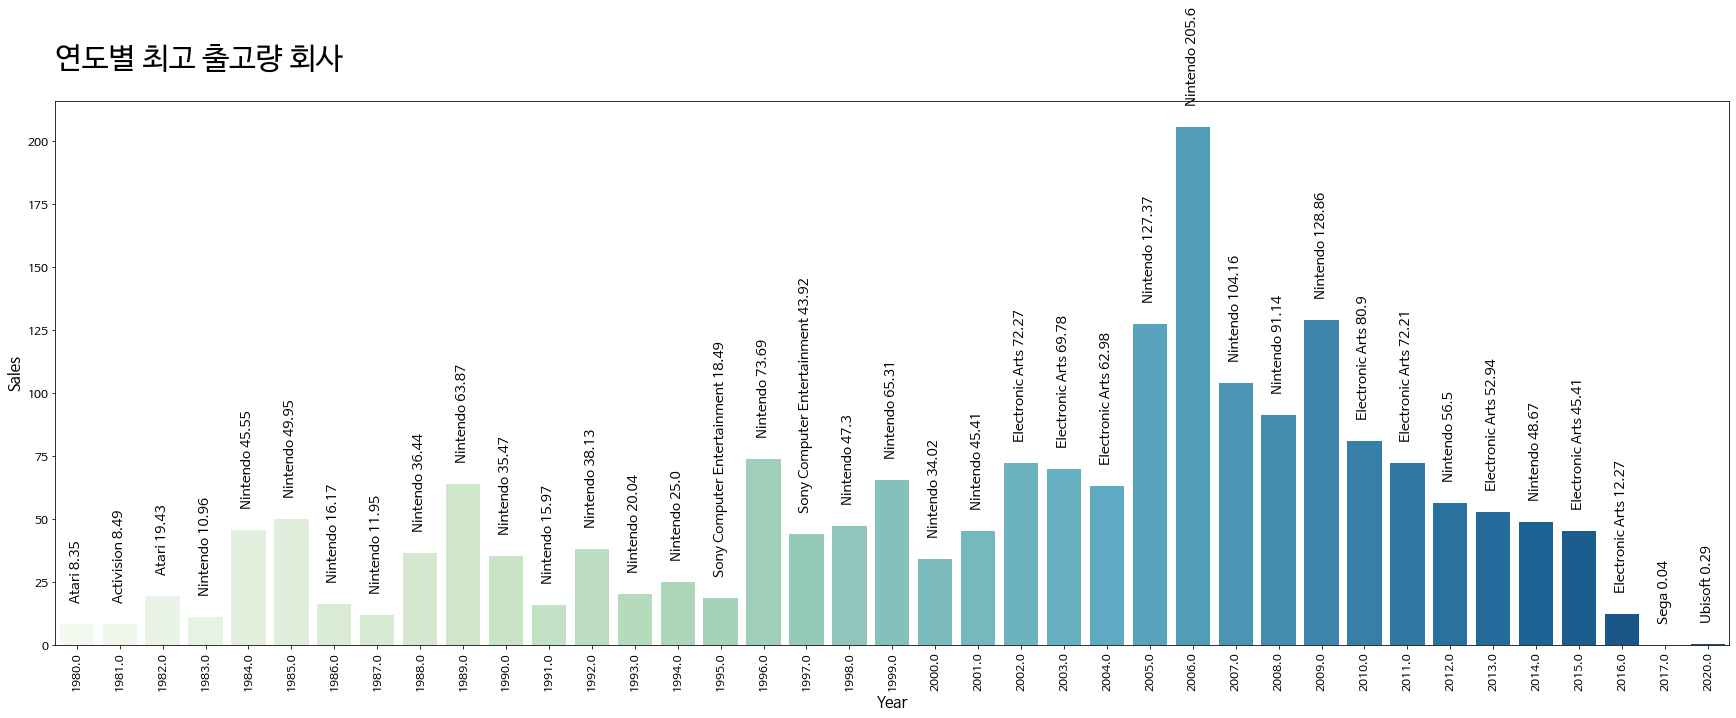

In [ ]:
plt.figure(figsize = (30, 10))
ax = sns.barplot(x="Year", y="Sales", data=year_max_com, palette = "GnBu")
idx = 0
for value in year_max_com["Sales"]:
  ax.text(x=idx, y = value + 10, s=str(publisher[idx] + " " + str(round(value, 2))),
          color = "black", size = 14, rotation = 90, ha = "center")
  idx += 1
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
ax.set_title("연도별 최고 출고량 회사", fontsize = 30, y = 1.05, loc="left")
plt.show()

# 2012년 이후 반다이 남코 엔터테인먼트가 출시는 많이 했지만 출고량은 닌텐도가 가장 높다.
# 닌텐도는 1900년대부터 최근 2014년까지도 최고 몇몇 해를 제외하고 출고량을 꾸준히 달성한 것으로 보여진다.
# 일렉트로닉 아츠도 2002년부터 2015년까지 최고 출고량을 달성한 해가 꽤 보인다.

# **4. 게임 분석**
### **4-1. 역대 출고량 Top 10 게임**

In [ ]:
sales_top10 = df.loc[df.Global_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x) + "위" for x in range(1, 11)]
sales_top10["rank"] = rank
sales_top10

Name Platform    Year  ... Other_Sales Global_Sales  rank
0                 Wii Sports      Wii  2006.0  ...        8.46        82.74    1위
1          Super Mario Bros.      NES  1985.0  ...        0.77        40.24    2위
2             Mario Kart Wii      Wii  2008.0  ...        3.31        35.83    3위
3          Wii Sports Resort      Wii  2009.0  ...        2.96        33.00    4위
4   Pokemon Red/Pokemon Blue       GB  1996.0  ...        1.00        31.38    5위
5                     Tetris       GB  1989.0  ...        0.58        30.26    6위
6      New Super Mario Bros.       DS  2006.0  ...        2.90        30.01    7위
7                   Wii Play      Wii  2006.0  ...        2.85        29.01    8위
8  New Super Mario Bros. Wii      Wii  2009.0  ...        2.26        28.61    9위
9                  Duck Hunt      NES  1984.0  ...        0.47        28.31   10위

[10 rows x 11 columns]

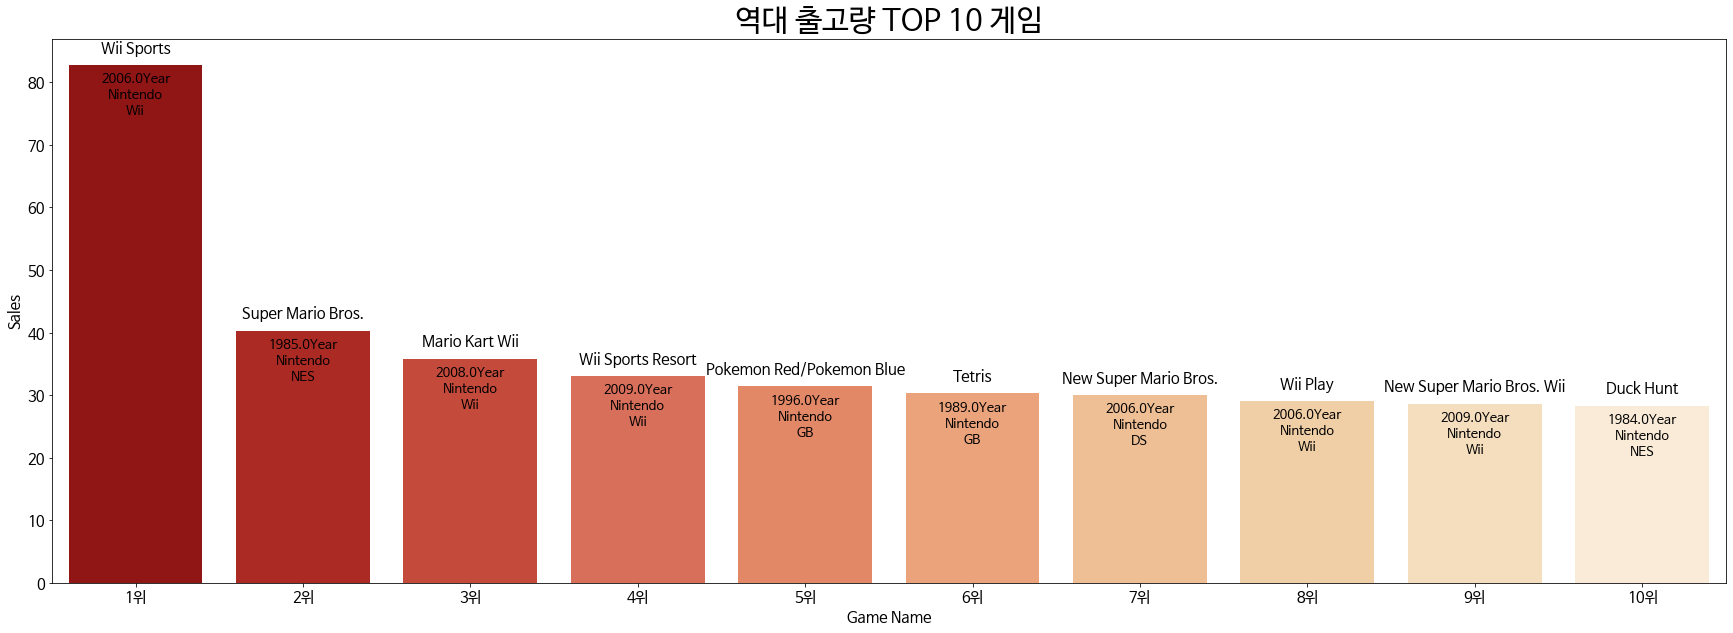

In [ ]:
# 시각화
plt.figure(figsize= (30, 10))
a = sns.barplot(x = "rank", y = "Global_Sales", data = sales_top10, palette= "OrRd_r")
i = 0
for name, year, val, platform, publisher in zip(sales_top10.Name, sales_top10.Year, sales_top10.Global_Sales,
                                                 sales_top10.Platform, sales_top10.Publisher):
  a.text(x=i, y=val + 2, s = (name), color = "black", ha = "center", fontsize = 15)
  a.text(x=i, y=val - 8, s=(str(year) + "Year" + "\n" + publisher + "\n" + platform),
         color = "black", ha = "center", fontsize = 13)
  i += 1
a.set_title("역대 출고량 TOP 10 게임", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Game Name", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show()

# 1위부터 10위까지 전부 닌텐도 사다.
# 특히 닌텐도 wii는 압도적으로 출고량 1위로 얼마나 인기가 있었는지 실감할 수 있다.
# wii를 제외하고는 슈퍼마리오, 마리오카트, 포켓몬, 테트리스, 덕 헌트도 많은 출고량을 달성했다.

### **4-2. 최근 10년 Top 10 게임**

In [ ]:
recent_top10 = df[df.Year >= 2012].sort_values("Global_Sales", ascending = False).head(10)
recent_top10= recent_top10.reset_index(drop=True)
recent_top10

Name  ... Global_Sales
0                         Grand Theft Auto V  ...        21.39
1                         Grand Theft Auto V  ...        16.38
2                  Call of Duty: Black Ops 3  ...        14.24
3                 Call of Duty: Black Ops II  ...        14.04
4                 Call of Duty: Black Ops II  ...        13.74
5                         Grand Theft Auto V  ...        11.99
6  Pokemon Omega Ruby/Pokemon Alpha Sapphire  ...        11.33
7                       Call of Duty: Ghosts  ...        10.21
8                    New Super Mario Bros. 2  ...         9.83
9                                     Halo 4  ...         9.76

[10 rows x 10 columns]

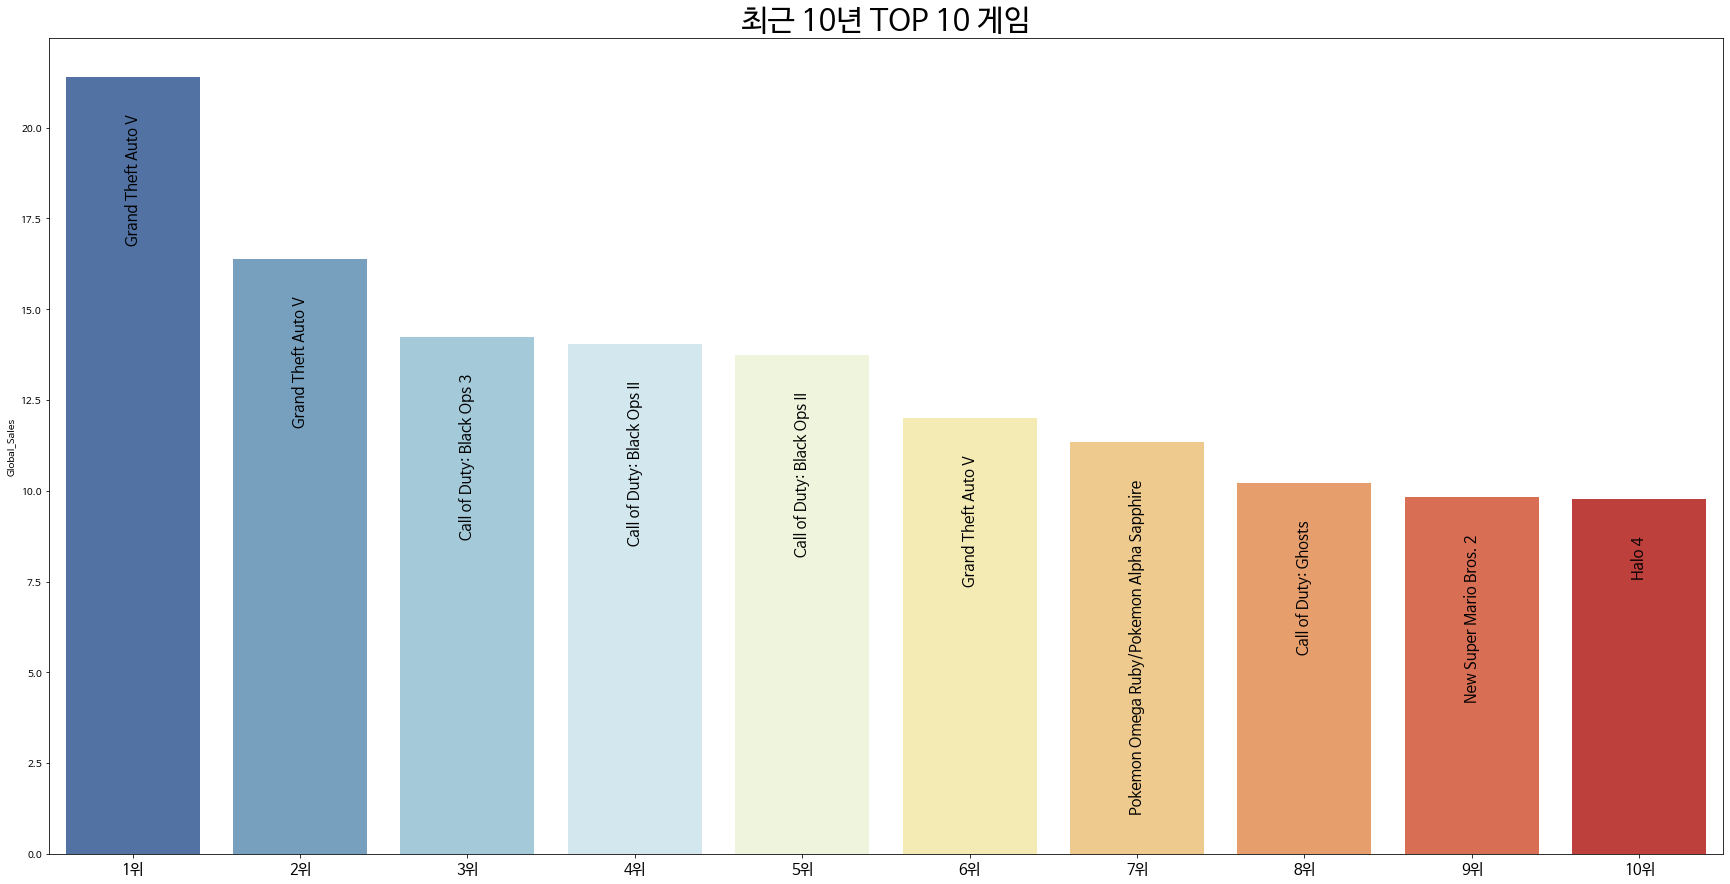

In [ ]:
plt.figure(figsize= (30, 15))
a = sns.barplot(x = recent_top10.index, y = "Global_Sales", data = recent_top10, palette = "RdYlBu_r")
i = 0 
for name, val in zip(recent_top10.Name, recent_top10.Global_Sales):
  a.text(x=i, y = val -1, s=(name), ha = "center", va = "top", fontsize = 15, rotation = 90)
  i += 1
a.set_title("최근 10년 TOP 10 게임", fontsize = 30)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x) + "위" for x in range(1, 11)], fontsize = 15)
plt.show()

# 그랜드 테프트 오토 v, 콜 오브 듀티, 포켓몬, 마리오, 헤일로 모드 시리즈 게임입니다.
# 즉, 최근 10년동안 시리즈 게임들이 많이 출고된 것을 확인할 수 있습니다. 

### **4-3. 최근 10년 Top10 게임의 장르 & 플랫폼**

In [ ]:
def recent_top3(df, col, sales):
  return df.groupby(col)[sales].sum().reset_index(name = "Sales").sort_values("Sales", ascending = False).head(3)

In [ ]:
genre_top3 = recent_top3(recent_top10, "Genre", "Global_Sales")
genre_top3

Genre  Sales
3       Shooter  61.99
0        Action  49.76
2  Role-Playing  11.33

In [ ]:
platform_top3 = recent_top3(recent_top10, "Platform", "Global_Sales")
platform_top3

Platform  Sales
3     X360  50.09
1      PS3  35.43
2      PS4  26.23

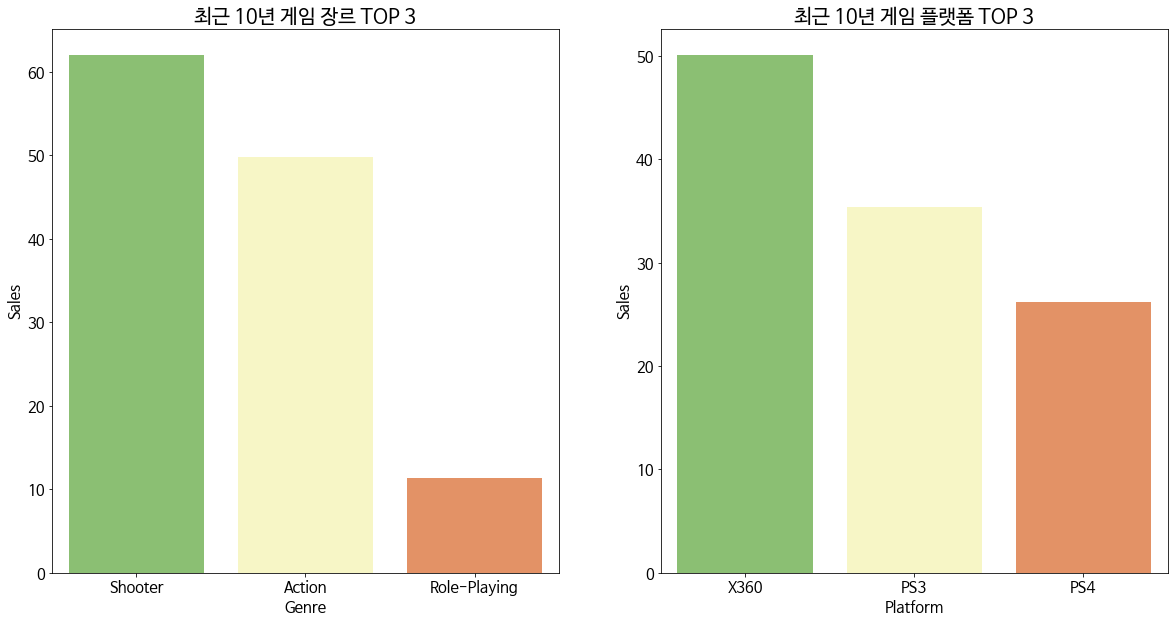

In [ ]:
data_list_3 = [genre_top3, platform_top3]
titles = ["최근 10년 게임 장르 TOP 3", "최근 10년 게임 플랫폼 TOP 3"]
x_labels = ["Genre", "Platform"]

fig, axs = plt.subplots(figsize = (20, 10), nrows = 1, ncols = 2)
for i, data, title in zip(range(3), data_list_3, titles):
  sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i], palette = "RdYlGn_r")
  axs[i].set_title(titles[i], fontsize=20)
  axs[i].tick_params(labelsize=15)
  axs[i].set_xlabel(x_labels[i], fontsize = 15)
  axs[i].set_ylabel("Sales", fontsize = 15)

plt.show()

# 최근 10년동안 출고량 top10의 장르는 슈터, 엑션, 롤플레잉이고, 플랫폼은 X360, 플레이스테이션입니다.
